In [60]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from glob import glob
from scipy.io import readsav
import cmcrameri.cm as cmcm
from astropy.visualization import ZScaleInterval

In [14]:
with fits.open("../../src/EIS/level1/SPCH/eis_l1_20170821_193019.fits") as hdul:
    data_cube_test = hdul[1].data
hdul[0].header

SIMPLE  =                    T / Written by IDL:  Mon Aug 28 04:00:46 2017      
BITPIX  =                    8 /                                                
NAXIS   =                    0 /                                                
NAXIS1  =              2244693 / Number of bytes per row                        
EXTEND  =                    T / File contains extensions                       
DATE    = '2017-08-27'         /                                                
ORIGIN  = 'ISAS    '           / Institute where FITS file was written          
DATA_LEV=                    1 / FITS Level (0, 1, 2)                           
DATE_RF0= '2017-08-27T19:00:46.368' / Date and time of Level 0 reformat         
ORIG_RF0= 'ISAS    '           / Institution where Level 0 reformat was done    
VER_RF0 = 'EIS_Lev0_Reformatter $Revision: 391 $' / Fits Level 0 reformatter ver
DATE_RF1= '2022-07-05T23:32:21.695' / Date and time of Level 1 reformat         
ORIG_RF1= 'ITA-UiO '        

In [15]:
hdul[1].header

XTENSION= 'BINTABLE'           / Written by IDL:  Mon Aug 28 04:00:52 2017      
BITPIX  =                    8 /                                                
NAXIS   =                    2 / Binary table                                   
NAXIS1  =              2244693 / Number of bytes per row                        
NAXIS2  =                   30 / Number of rows                                 
PCOUNT  =                    0 / Random parameter count                         
GCOUNT  =                    1 / Group count                                    
TFIELDS =                   44 / Number of columns                              
DATE    = '2017-08-27'         /                                                
ORIGIN  = 'ISAS    '           / Institute where FITS file was written          
DATA_LEV=                    1 / FITS Level (0, 1, 2)                           
DATE_RF0= '2017-08-27T19:00:46.368' / Date and time of Level 0 reformat         
ORIG_RF0= 'ISAS    '        

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


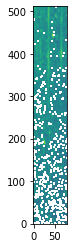

In [21]:
plt.imshow(np.log10(data_cube_test[0][1]),origin="lower")

In [13]:
for filename in glob("../../src/EIS/level1/NPCH/eis_l1*"):
    with fits.open("../../src/EIS/level1/NPCH/eis_er_20170821_150319.fits") as hdul:
        print(hdul[0].header["SLIT_ID"])

40"
40"
40"
40"
40"
40"
40"
40"
40"
40"
40"
40"
40"
40"
40"
40"
40"


In [31]:
idl_sav_test = readsav("../../sav/EIS/SPCH/Fe XII 195.480_tilt_corr.sav",verbose=True)

--------------------------------------------------
Date: Tue Jul  5 16:41:59 2022
User: yjzhu
Host: cdhcp47.IfA.Hawaii.Edu
--------------------------------------------------
Format: 11
Architecture: x86_64
Operating System: darwin
IDL Version: 8.2
--------------------------------------------------
Successfully read 4 records of which:
 - 1 are of type VARIABLE
 - 1 are of type VERSION
 - 1 are of type TIMESTAMP
--------------------------------------------------
Available variables:
 - wd_shift [<class 'numpy.recarray'>]
--------------------------------------------------


In [43]:
idl_sav_test["wd_shift"].solar_x

array([array([-47.105373 , -45.085716 , -43.126484 , -41.102386 , -39.132885 ,
              -37.136086 , -35.139282 , -33.181335 , -31.110315 , -29.110722 ,
              -27.074844 , -25.146465 , -23.143166 , -21.09969  , -19.104612 ,
              -17.168085 , -15.122931 , -13.161668 , -11.133862 ,  -9.180885 ,
               -7.149463 ,  -5.156661 ,  -3.0500283,  -1.1164455,   0.8803549,
                2.8226194,   4.901787 ,   6.9037895,   8.867554 ,  10.864355 ],
             dtype=float32)                                                    ],
      dtype=object)

Text(0, 0.5, 'Solar-Y [arcsec]')

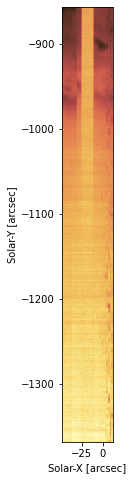

In [54]:
fig, ax = plt.subplots(figsize=(4,8))
ax.pcolormesh(idl_sav_test["wd_shift"].solar_x[0],idl_sav_test["wd_shift"].solar_y[0],np.log10(np.sum(idl_sav_test["wd_shift"].int[0],axis=2)),
        cmap=cmcm.lajolla,norm=)
ax.axis('scaled')
ax.set_xlabel("Solar-X [arcsec]")
ax.set_ylabel("Solar-Y [arcsec]")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


(0.0, 1.0, 0.0, 1.0)

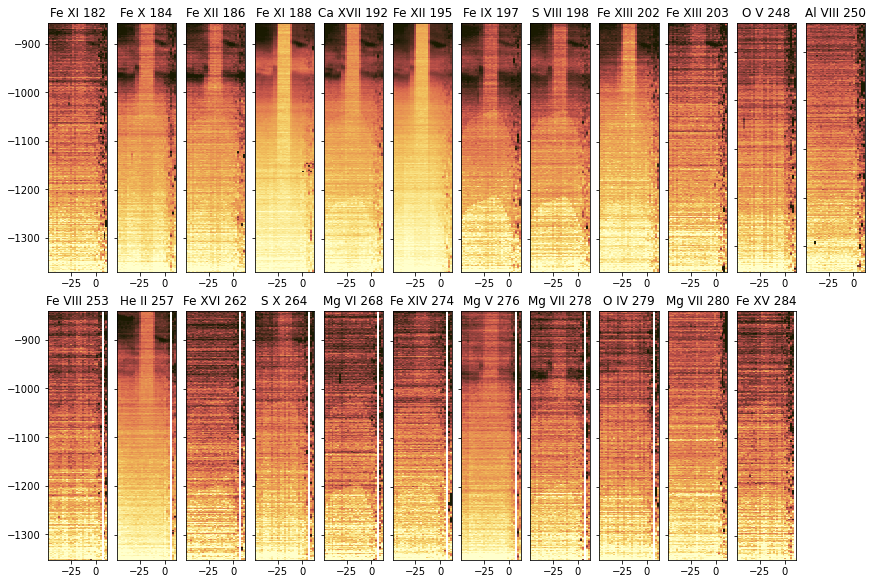

In [73]:
fig, axes = plt.subplots(2,12,figsize=(12,8),constrained_layout=True)
eis_filenames = sorted(glob("../../sav/EIS/SPCH/*.sav"))

axes_flat = axes.flatten()
for ii, eis_filename in enumerate(eis_filenames):
    idl_sav = readsav(eis_filename,verbose=False)
    img = np.log10(np.sum(idl_sav["wd_shift"].int[0],axis=2))
    vmin, vmax = np.nanpercentile(img, [3,99])
    axes_flat[ii].pcolormesh(idl_sav["wd_shift"].solar_x[0],idl_sav["wd_shift"].solar_y[0],img,
        cmap=cmcm.lajolla,vmin=vmin,vmax=vmax,rasterized=True)

    axes_flat[ii].set_title(idl_sav["wd_shift"].line_id[0].decode("utf-8")[:-4])
    
    if ii%12 != 0:
        axes_flat[ii].tick_params(labelleft=False)

axes_flat[-1].axis("off")

    